In [ ]:
!pip install torch torchvision diffusers transformers
!pip install datasets

In [ ]:
import torch
import torchvision
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from transformers import CLIPTextModel
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

In [ ]:
from datasets import load_dataset

In [ ]:
from datasets import load_dataset

ds = load_dataset("comHannah/bokeh-dataset")

In [ ]:
class BokehDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.normal_images = [f for f in os.listdir(os.path.join(root_dir, 'normal')) if f.endswith('.jpg' or '.png')]
        self.bokeh_images = [f for f in os.listdir(os.path.join(root_dir, 'bokeh')) if f.endswith('.jpg' or '.png')]

In [ ]:
def __len__(self):
        return len(self.normal_images)

In [ ]:
def __getitem__(self, idx):
        normal_img = Image.open(os.path.join(self.root_dir, 'normal', self.normal_images[idx])).convert('RGB')
        bokeh_img = Image.open(os.path.join(self.root_dir, 'bokeh', self.bokeh_images[idx])).convert('RGB')

        if self.transform:
            normal_img = self.transform(normal_img)
            bokeh_img = self.transform(bokeh_img)

        return normal_img, bokeh_img

In [ ]:
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [ ]:
from datasets import load_dataset

# Load the dataset
ds = load_dataset("comHannah/bokeh-dataset")

# Print basic information about the dataset
print(ds)

# Look at the first example
print(ds['train'][0])

# Check the column names
print(ds['train'].column_names)

# Check the image size (assuming there's an 'image' column)
if 'image' in ds['train'].column_names:
    print(ds['train'][0]['image'].size)

In [ ]:
from datasets import load_dataset

# Load the dataset
ds = load_dataset("comHannah/bokeh-dataset")

# Print basic information about the dataset
print(ds)

# Look at the first example
print(ds['train'][0])

# Check the column names
print(ds['train'].column_names)

# Check the image size (assuming there's an 'image' column)
if 'image' in ds['train'].column_names:
    print(ds['train'][0]['image'].size)

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image

class BokehDataset(Dataset):
    def __init__(self, hf_dataset, split='train', transform=None):
        self.dataset = hf_dataset[split]
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]

        original_img = item['original_image'].convert('RGB')
        bokeh_img = item['bokeh_image'].convert('RGB')

        if self.transform:
            original_img = self.transform(original_img)
            bokeh_img = self.transform(bokeh_img)

        return original_img, bokeh_img

# Define transformations
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Create dataset and dataloader
bokeh_dataset = BokehDataset(ds, split='train', transform=transform)
dataloader = torch.utils.data.DataLoader(bokeh_dataset, batch_size=4, shuffle=True, num_workers=2)

In [ ]:
from huggingface_hub import login

# Run this and input your token when prompted
login()

# Alternatively, you can set the token directly (replace 'your_token_here' with your actual token)
# login(token="your_token_here")

In [ ]:
import os
os.environ['HF_HUB_DISABLE_SYMLINKS_WARNING'] = '1'

import torch
from diffusers import ControlNetModel, StableDiffusionControlNetPipeline

# Initialize the ControlNet model
controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-depth")

# Initialize the StableDiffusionControlNetPipeline with a different base model
pipeline = StableDiffusionControlNetPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    controlnet=controlnet,
    torch_dtype=torch.float16
)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pipeline = pipeline.to(device)

print("ControlNet and pipeline setup completed successfully!")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
!pip install --upgrade midas

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image

class BokehDataset(Dataset):
    def __init__(self, hf_dataset, split='train', transform=None):
        self.dataset = hf_dataset[split]
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]

        original_img = item['original_image'].convert('RGB')
        bokeh_img = item['bokeh_image'].convert('RGB')

        if self.transform:
            original_img = self.transform(original_img)
            bokeh_img = self.transform(bokeh_img)

        return original_img, bokeh_img

# Define transformations
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Create dataset and dataloader
bokeh_dataset = BokehDataset(ds, split='train', transform=transform)
dataloader = torch.utils.data.DataLoader(bokeh_dataset, batch_size=4, shuffle=True, num_workers=2)

In [ ]:
optimizer = torch.optim.Adam(pipeline.controlnet.parameters(), lr=1e-5)

In [ ]:
controlnet = pipeline.controlnet

In [ ]:
pip install timm

In [ ]:
import torch
import torch.nn.functional as F
from torchvision.transforms import Compose, Resize, Normalize
import timm

def generate_depth_maps(images, device):
    # Load a pre-trained MiDaS model
    model = timm.create_model('tf_efficientnet_b5_ap', pretrained=True, features_only=True, out_indices=[2])
    model.to(device)
    model.eval()

    # Prepare transform
    transform = Compose([
        Resize((384, 384)),
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    depth_maps = []
    with torch.no_grad():
        for img in images:
            # Ensure the image is in the correct format
            if img.dim() == 3:
                img = img.unsqueeze(0)  # Add batch dimension if it's missing

            # Apply the transform
            img_input = transform(img).to(device)

            # Get features
            features = model(img_input)[0]

            # Use the features as a simple depth map
            depth_map = F.interpolate(features, size=img.shape[2:], mode='bilinear', align_corners=False)

            # Normalize the depth map
            depth_map = (depth_map - depth_map.min()) / (depth_map.max() - depth_map.min())

            depth_maps.append(depth_map.squeeze(0))

    return torch.stack(depth_maps)

In [ ]:
from transformers import CLIPTokenizer
from tqdm import tqdm

def train_controlnet(controlnet, pipeline, dataloader, num_epochs, device):
    controlnet.train()
    pipeline.unet.eval()  # We're not training the UNet
    loss_fn = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(controlnet.parameters(), lr=1e-5)

    # Initialize the tokenizer
    tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

    for epoch in range(num_epochs):
        epoch_loss = 0

        for batch in tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            original_imgs, bokeh_imgs = batch
            original_imgs = original_imgs.to(device)
            bokeh_imgs = bokeh_imgs.to(device)

            # Generate depth maps
            depth_maps = generate_depth_maps(original_imgs, device)

            # Prepare text inputs
            text_inputs = tokenizer(["Add bokeh effect"] * len(original_imgs), padding=True, return_tensors="pt").to(device)

            # Get text embeddings
            with torch.no_grad():
                text_embeddings = pipeline.text_encoder(**text_inputs)[0]

            # Add noise to original images
            noise = torch.randn_like(original_imgs)
            timesteps = torch.randint(0, pipeline.scheduler.num_train_timesteps, (original_imgs.shape[0],), device=device).long()
            noisy_imgs = pipeline.scheduler.add_noise(original_imgs, noise, timesteps)

            # Get ControlNet and UNet predictions
            controlnet_output = controlnet(noisy_imgs, timesteps, text_embeddings, depth_maps)
            unet_output = pipeline.unet(noisy_imgs, timesteps, text_embeddings, controlnet_output)

            # Calculate loss
            loss = loss_fn(unet_output.sample, bokeh_imgs)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(dataloader):.4f}")

    return controlnet

In [ ]:
import torch
import torch.nn.functional as F
from torchvision.transforms import Compose, Resize, Normalize
import timm

def generate_depth_maps(images, device):
    # Load a pre-trained MiDaS model
    model = timm.create_model('tf_efficientnet_b5_ap', pretrained=True, features_only=True, out_indices=[2])
    model.to(device)
    model.eval()

    # Prepare transform
    transform = Compose([
        Resize((384, 384)),
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    depth_maps = []
    with torch.no_grad():
        for img in images:
            # Ensure the image is in the correct format
            if img.dim() == 3:
                img = img.unsqueeze(0)  # Add batch dimension if it's missing

            # Apply the transform
            img_input = transform(img).to(device)

            # Get features
            features = model(img_input)[0]

            # Use the features as a simple depth map
            depth_map = F.interpolate(features, size=img.shape[2:], mode='bilinear', align_corners=False)

            # Normalize the depth map
            depth_map = (depth_map - depth_map.min()) / (depth_map.max() - depth_map.min())

            depth_maps.append(depth_map.squeeze(0))

    return torch.stack(depth_maps)

In [ ]:
from transformers import CLIPTokenizer
from tqdm import tqdm

def train_controlnet(controlnet, pipeline, dataloader, num_epochs, device):
    controlnet.train()
    pipeline.unet.eval()  # We're not training the UNet
    loss_fn = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(controlnet.parameters(), lr=1e-5)

    # Initialize the tokenizer
    tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

    for epoch in range(num_epochs):
        epoch_loss = 0

        for batch in tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            original_imgs, bokeh_imgs = batch
            original_imgs = original_imgs.to(device)
            bokeh_imgs = bokeh_imgs.to(device)

            # Generate depth maps
            depth_maps = generate_depth_maps(original_imgs, device)

            # Prepare text inputs
            text_inputs = tokenizer(["Add bokeh effect"] * len(original_imgs), padding=True, return_tensors="pt").to(device)

            # Get text embeddings
            with torch.no_grad():
                text_embeddings = pipeline.text_encoder(**text_inputs)[0]

            # Add noise to original images
            noise = torch.randn_like(original_imgs)
            timesteps = torch.randint(0, pipeline.scheduler.num_train_timesteps, (original_imgs.shape[0],), device=device).long()
            noisy_imgs = pipeline.scheduler.add_noise(original_imgs, noise, timesteps)

            # Get ControlNet and UNet predictions
            controlnet_output = controlnet(noisy_imgs, timesteps, text_embeddings, depth_maps)
            unet_output = pipeline.unet(noisy_imgs, timesteps, text_embeddings, controlnet_output)

            # Calculate loss
            loss = loss_fn(unet_output.sample, bokeh_imgs)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(dataloader):.4f}")

    return controlnet

In [ ]:
def apply_bokeh_effect(pipeline, image, depth_map, prompt="Add bokeh effect", num_inference_steps=50):
       pipeline.controlnet.eval()
       with torch.no_grad():
           # Prepare inputs
           image = image.unsqueeze(0).to(pipeline.device)
           depth_map = depth_map.unsqueeze(0).to(pipeline.device)

           # Generate image
           output = pipeline(
               prompt,
               image=image,
               control_image=depth_map,
               num_inference_steps=num_inference_steps
           ).images[0]

       return output

In [ ]:
!pip install torch torchvision diffusers transformers datasets

In [ ]:
import torch
from tqdm import tqdm
from transformers import CLIPTokenizer

def generate_depth_maps(images, device):
    # This is a placeholder function. You should implement proper depth estimation here.
    # For now, we'll just create a simple gradient as a mock depth map
    batch_size, _, height, width = images.shape
    depth_maps = torch.linspace(0, 1, width, device=device).repeat(batch_size, 1, height, 1)
    return depth_maps

def train_controlnet(controlnet, pipeline, dataloader, num_epochs, device):
    controlnet.train()
    pipeline.unet.eval()  # We're not training the UNet
    loss_fn = BokehLoss().to(device)
    optimizer = torch.optim.Adam(controlnet.parameters(), lr=1e-5)

    # Initialize the tokenizer
    tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

    for epoch in range(num_epochs):
        epoch_loss = 0

        for batch in tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            original_imgs, bokeh_imgs = batch
            original_imgs = original_imgs.to(device)
            bokeh_imgs = bokeh_imgs.to(device)

            # Generate depth maps
            depth_maps = generate_depth_maps(original_imgs, device)

            # Prepare text inputs
            text_inputs = tokenizer(["Add bokeh effect"] * len(original_imgs), padding=True, return_tensors="pt").to(device)

            # Get text embeddings
            with torch.no_grad():
                text_embeddings = pipeline.text_encoder(**text_inputs)[0]

            # Add noise to original images
            noise = torch.randn_like(original_imgs)
            timesteps = torch.randint(0, pipeline.scheduler.num_train_timesteps, (original_imgs.shape[0],), device=device).long()
            noisy_imgs = pipeline.scheduler.add_noise(original_imgs, noise, timesteps)

            # Get ControlNet and UNet predictions
            controlnet_output = controlnet(noisy_imgs, timesteps, text_embeddings, controlnet_cond=depth_maps)
            unet_output = pipeline.unet(noisy_imgs, timesteps, text_embeddings, down_block_additional_residuals=controlnet_output[0], mid_block_additional_residual=controlnet_output[1])

            # Calculate loss
            loss = loss_fn(unet_output.sample, bokeh_imgs)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(dataloader):.4f}")

    return controlnet

In [ ]:
def apply_bokeh_effect(pipeline, image, prompt="Add bokeh effect", num_inference_steps=50):
    # Generate depth map
    depth_map = generate_depth_maps(image, image.device)

    # Apply the effect
    output = pipeline(
        prompt,
        image=image,
        control_image=depth_map,
        num_inference_steps=num_inference_steps
    ).images[0]

    return output


In [ ]:
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage

def visualize_results(original_image, depth_map, bokeh_image):
    to_pil = ToPILImage()

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(to_pil(original_image.squeeze().cpu()))
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(to_pil(depth_map.squeeze().cpu()), cmap='viridis')
    axs[1].set_title('Depth Map')
    axs[1].axis('off')

    axs[2].imshow(bokeh_image)
    axs[2].set_title('Bokeh Effect')
    axs[2].axis('off')

    plt.tight_layout()
    plt.show()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:140: FutureWarning: Accessing config attribute `vae_latent_channels` directly via 'VaeImageProcessor' object attribute is deprecated. Please access 'vae_latent_channels' over 'VaeImageProcessor's config object instead, e.g. 'scheduler.config.vae_latent_channels'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


  0%|          | 0/50 [00:00<?, ?it/s]

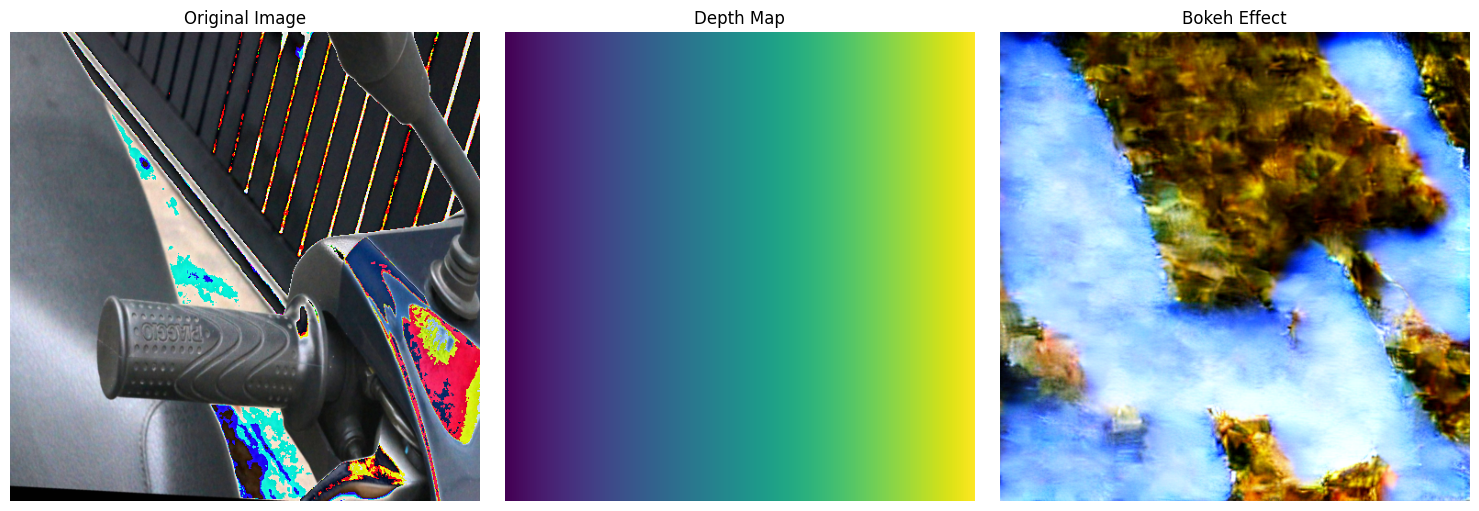

In [ ]:
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage

def apply_bokeh_effect(pipeline, image, prompt="Add bokeh effect", num_inference_steps=50):
    # Generate depth map
    depth_map = generate_depth_maps(image.unsqueeze(0), image.device)

    # Apply the effect
    with torch.autocast("cuda"):  # Added autocast to ensure consistent dtype
        output = pipeline(
            prompt,
            image=image.unsqueeze(0),
            control_image=depth_map,
            num_inference_steps=num_inference_steps
        ).images[0]

    return depth_map.squeeze(), output

def visualize_results(original_image, depth_map, bokeh_image):
    to_pil = ToPILImage()

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(to_pil(original_image.squeeze().cpu()))
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(to_pil(depth_map.squeeze().cpu()), cmap='viridis')
    axs[1].set_title('Depth Map')
    axs[1].axis('off')

    axs[2].imshow(bokeh_image)
    axs[2].set_title('Bokeh Effect')
    axs[2].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
sample_image, _ = next(iter(dataloader))
sample_image = sample_image[0].to(device)  # Use the first image in the batch

depth_map, bokeh_image = apply_bokeh_effect(pipeline, sample_image)
visualize_results(sample_image, depth_map, bokeh_image)

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


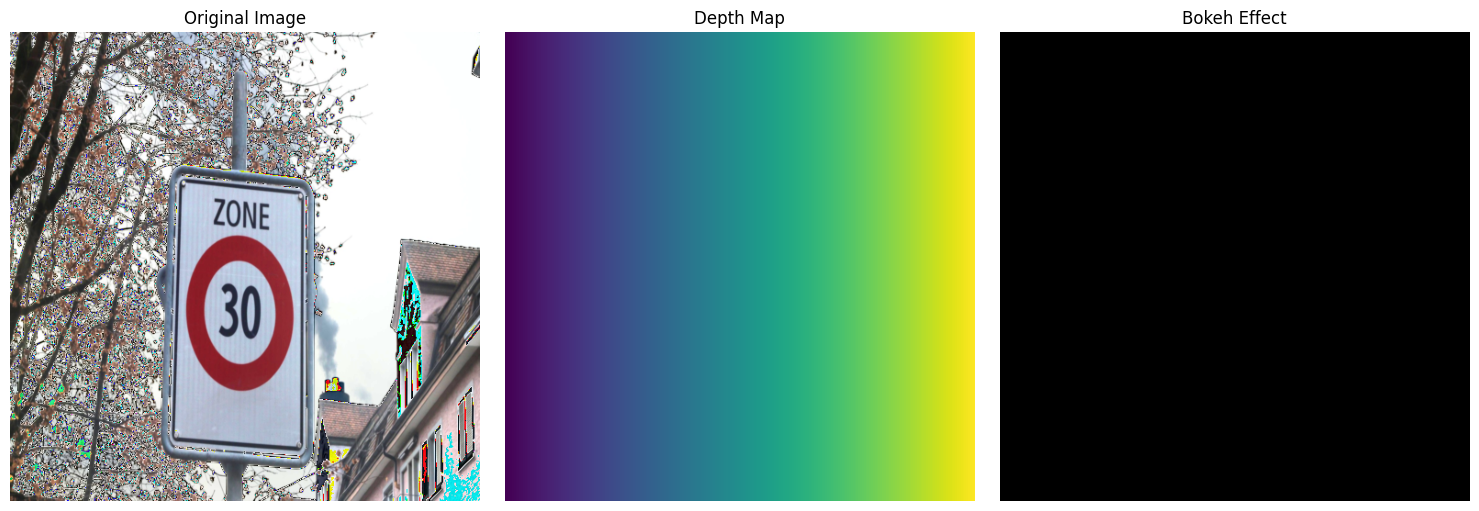

In [ ]:
# Assuming you have already trained your ControlNet and set up the pipeline

# Get a sample image from your dataset
sample_image, _ = next(iter(dataloader))
sample_image = sample_image[0].to(device)  # Use the first image in the batch

# Apply bokeh effect
depth_map, bokeh_image = apply_bokeh_effect(pipeline, sample_image)

# Visualize the results
visualize_results(sample_image, depth_map, bokeh_image)

In [ ]:
def apply_bokeh_effect(pipeline, image, prompt="Add bokeh effect", num_inference_steps=50):
    # Generate depth map
    depth_map = generate_depth_maps(image.unsqueeze(0), image.device)

    # Apply the effect
    with torch.autocast("cuda"): # Added autocast to ensure consistent dtype
        output = pipeline(
            prompt,
            image=image.unsqueeze(0),
            control_image=depth_map,
            num_inference_steps=num_inference_steps
        ).images[0]

    return depth_map.squeeze(), output